# Evaluating the Ethics of Yelp Review Filtering Using Deceptive Opinion Spam Detection

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
regular_reviews = pd.read_csv('reg_reviews_NLP_01.csv')
not_recommended_reviews= pd.read_csv('not_reviews_NLP.csv')

In [3]:
regular_reviews['regular'] = 1
not_recommended_reviews['regular'] = 0

In [4]:
reviews = regular_reviews.append(not_recommended_reviews, ignore_index = True).dropna(axis=1)
reviews = reviews.reset_index(drop = True)
reviews.head()

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,Sfreq5,avgSentiment,friends,has_photo,numSentence,numWords,photos,rating,regular,restaurant_id,review,reviews,totSentiment
0,0,5,3,1,0,0,1.555556,0,True,9,92,2,4,1,617,Stopped in for lunch on a Friday for the first...,13,14.0
1,0,3,1,2,0,0,1.833333,0,True,6,56,1,5,1,617,I was looking for a place to eat that made me ...,4,11.0
2,0,4,8,1,0,0,1.769231,1,True,13,115,19,3,1,617,It was a busy early evening. The hostess worke...,27,23.0
3,0,5,1,2,0,0,1.625000,769,True,8,119,4735,3,1,617,Located right near the terminal 2 cruise port ...,1113,13.0
4,1,4,0,2,0,0,1.428571,515,True,7,100,643,2,1,617,im sorry for the poor pizza Samantha. Im not s...,234,10.0


In [5]:
reviews.describe()

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,Sfreq5,avgSentiment,friends,numSentence,numWords,photos,rating,regular,restaurant_id,reviews,totSentiment
count,104058.000000,104058.000000,104058.000000,104058.000000,104058.000000,104058.0,104058.000000,104058.000000,104058.000000,104058.000000,104058.000000,104058.000000,104058.000000,104058.000000,104058.000000,104058.000000
mean,0.087922,3.142680,1.420746,2.523362,0.337427,0.0,2.123806,97.633608,7.512137,96.581301,158.679871,3.874253,0.739982,352.116060,103.086067,14.903967
std,0.328025,3.782517,2.006301,2.260855,0.636209,0.0,0.605883,299.583629,6.575881,98.508692,1424.245593,1.415516,0.438646,208.737753,326.511804,11.992781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.700000,0.000000,3.000000,33.000000,0.000000,3.000000,0.000000,167.000000,5.000000,7.000000
50%,0.000000,2.000000,1.000000,2.000000,0.000000,0.0,2.000000,9.000000,6.000000,66.000000,1.000000,4.000000,1.000000,374.000000,19.000000,12.000000
75%,0.000000,4.000000,2.000000,3.000000,1.000000,0.0,2.500000,82.000000,9.000000,125.000000,20.000000,5.000000,1.000000,551.000000,76.000000,19.000000
max,7.000000,46.000000,101.000000,33.000000,11.000000,0.0,4.000000,5000.000000,101.000000,1000.000000,79588.000000,5.000000,1.000000,665.000000,12357.000000,202.000000


## Data cleaning

- removed rows with missing values from original files
- dropped unnecessary columns for furthur analysis
- converted data types; 'has_photo' (boolean to int)
- converted sentiment frequency count into frequency ratio
- replaced NaN from sentiment ratio with 0

In [6]:
# Delete empty rows w/ -1 values from 'rating' and 'reviews' features

nonEmptyRows = (reviews.rating != -1)& (reviews.reviews != -1)

reviews2 = reviews.loc[nonEmptyRows,:]
reviews2.reset_index(drop = True)
print('Deleted row amount = ', len(reviews)-len(reviews2))

Deleted row amount =  2030


In [7]:
# Drop ['review', 'Sfreq5', totSentiment ] text column

reviews2 = reviews2.drop(['review', 'Sfreq5', 'totSentiment'], axis = 1)

In [8]:
# Replace boolean to numerical value for 'has_photo'
reviews2.has_photo = reviews2.has_photo.astype(int)

In [9]:
# Scale sentiment frequency values(Sfreq0-4) into ratio by dividing by the total number of sentence
reviews2.loc[:, ['Sfreq0','Sfreq1','Sfreq2','Sfreq3','Sfreq4' ]] = reviews2.loc[:,['Sfreq0','Sfreq1','Sfreq2','Sfreq3','Sfreq4' ]].div(reviews2.numSentence, axis = 0)

In [10]:
reviews2.loc[reviews2.Sfreq0.isnull(), :]

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,avgSentiment,friends,has_photo,numSentence,numWords,photos,rating,regular,restaurant_id,reviews
7425,NaN,NaN,NaN,NaN,NaN,0.0,1223,1,0,0,14131,4,1,20,1815
8254,NaN,NaN,NaN,NaN,NaN,0.0,12,1,0,0,23,4,1,20,120
14014,NaN,NaN,NaN,NaN,NaN,0.0,507,1,0,0,2018,4,1,534,1009
14852,NaN,NaN,NaN,NaN,NaN,0.0,6,1,0,0,53,4,1,656,34
18967,NaN,NaN,NaN,NaN,NaN,0.0,463,1,0,0,548,4,1,613,458
20471,NaN,NaN,NaN,NaN,NaN,0.0,1620,1,0,0,70999,3,1,520,2015
34744,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,5,1,414,77
41192,NaN,NaN,NaN,NaN,NaN,0.0,53,1,0,0,14,2,1,550,154
47756,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,2,1,167,2
66044,NaN,NaN,NaN,NaN,NaN,0.0,664,1,0,0,866,1,1,396,949


In [11]:
# Replace NaN found above w/ 0; this is happening because there is no text in reviews
print(reviews2.isnull().sum())
reviews2 = reviews2.fillna(0)

Sfreq0           21
Sfreq1           21
Sfreq2           21
Sfreq3           21
Sfreq4           21
avgSentiment      0
friends           0
has_photo         0
numSentence       0
numWords          0
photos            0
rating            0
regular           0
restaurant_id     0
reviews           0
dtype: int64


## New Features
- 'extream' : 1 for rating either 1 or 5, 2 for the rest rating values
- 'storeReviewTot' : total number of sampled reviews for each restaurant
- 'storeReviewRatio' : For each restaurant review, the ratio of not-recommended/regular reviews

### 'extream' feature

In [12]:
# 'extream' feature where rating == 1|5

reviews2['extream'] = ((reviews2.rating == 1) | (reviews2.rating ==  5)).astype(int)

In [13]:
# check 'extream' values
reviews2.loc[45:50, ['rating','extream']]

,rating,extream
45,5,1
46,4,0
47,4,0
48,5,1
49,5,1
50,1,1


### 'storeReviewTot' feature

In [14]:
# total number of reviews for each restaurantID is counted

reviews2['storeReviewTot'] = reviews2.groupby('restaurant_id')['restaurant_id'].transform('count')

In [15]:
reviews2.loc[:,['restaurant_id','storeReviewTot']]

,restaurant_id,storeReviewTot
0,617,228
1,617,228
2,617,228
3,617,228
4,617,228
5,617,228
6,617,228
7,617,228
8,617,228
9,617,228


### 'storeReviewRatio' feature

In [16]:
# 'storeReviewRatio' = notRecommended/regular reviews
groupbyID = reviews2.groupby(['restaurant_id', 'regular']).size()
df_groupbyID = pd.DataFrame({'notRecommended' : groupbyID[:,0], 'regular' : groupbyID[:,1]})
df_groupbyID = df_groupbyID.fillna(0)  # this is for some restaurant w/ zero not-recommended reviews
df_groupbyID['storeReviewRatio'] = df_groupbyID['notRecommended']/df_groupbyID['regular']
reviews2['storeReviewRatio'] = df_groupbyID.storeReviewRatio

In [17]:
# reviews3 = reviews2.dropna(axis = 0)
# reviews3 = reviews2.reset_index(drop = True)
reviews2 = reviews2.fillna(0)
reviews2 = reviews2.replace(np.inf, 0)

In [18]:
reviews2.describe()

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,avgSentiment,friends,has_photo,numSentence,numWords,photos,rating,regular,restaurant_id,reviews,extream,storeReviewTot,storeReviewRatio
count,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000,102028.000000
mean,0.011639,0.364559,0.171612,0.389653,0.062332,2.126069,99.230339,0.745825,7.625564,98.250872,159.659064,3.965206,0.734808,351.815364,104.954816,0.543998,1023.292077,0.000413
std,0.057704,0.263951,0.188109,0.274584,0.141995,0.611078,301.855280,0.435399,6.574904,98.537630,1393.383955,1.261215,0.441438,208.697754,329.002230,0.498063,1016.904398,0.013785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.166667,0.000000,0.200000,0.000000,1.687500,0.000000,0.000000,3.000000,34.000000,0.000000,3.000000,0.000000,167.000000,6.000000,0.000000,264.000000,0.000000
50%,0.000000,0.343750,0.142857,0.333333,0.000000,2.052632,10.000000,1.000000,6.000000,67.000000,2.000000,4.000000,1.000000,374.000000,20.000000,1.000000,711.000000,0.000000
75%,0.000000,0.529412,0.272727,0.538462,0.058824,2.500000,84.000000,1.000000,10.000000,127.000000,21.000000,5.000000,1.000000,551.000000,78.000000,1.000000,1354.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5000.000000,1.000000,101.000000,1000.000000,79499.000000,5.000000,1.000000,665.000000,12357.000000,1.000000,4054.000000,3.000000


## Data exploration

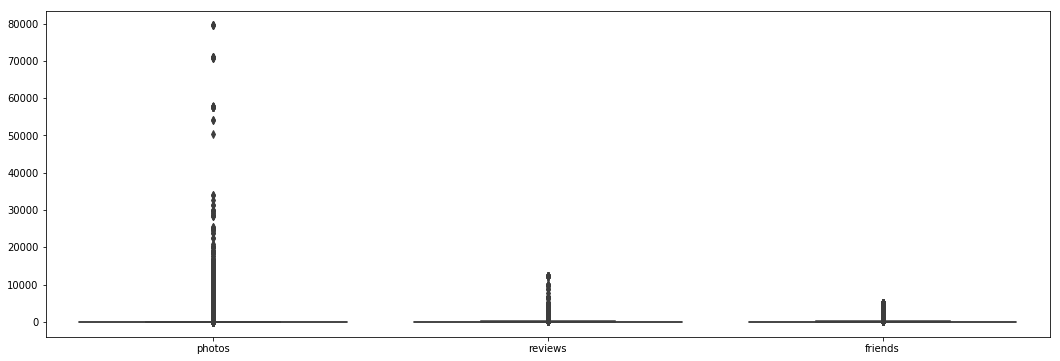

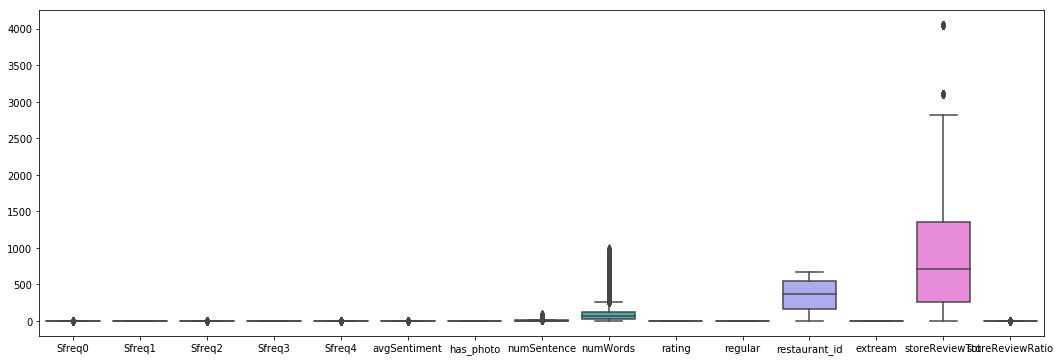

In [19]:
# Box Plot
import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize = (18,6))
sns.boxplot(data = reviews2.loc[:, ['photos', 'reviews', 'friends']])
plt.show()

plt.figure(figsize = (18,6))
df1 = reviews2.drop(['photos', 'reviews', 'friends'], axis = 1)
sns.boxplot(data = df1)
plt.show()

## Dataset size

In [20]:
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102028 entries, 0 to 104057
Data columns (total 18 columns):
Sfreq0              102028 non-null float64
Sfreq1              102028 non-null float64
Sfreq2              102028 non-null float64
Sfreq3              102028 non-null float64
Sfreq4              102028 non-null float64
avgSentiment        102028 non-null float64
friends             102028 non-null int64
has_photo           102028 non-null int64
numSentence         102028 non-null int64
numWords            102028 non-null int64
photos              102028 non-null int64
rating              102028 non-null int64
regular             102028 non-null int64
restaurant_id       102028 non-null int64
reviews             102028 non-null int64
extream             102028 non-null int64
storeReviewTot      102028 non-null int64
storeReviewRatio    102028 non-null float64
dtypes: float64(7), int64(11)
memory usage: 19.8 MB


## feature description needed somewhere

In [21]:
list(reviews2)

['Sfreq0',
 'Sfreq1',
 'Sfreq2',
 'Sfreq3',
 'Sfreq4',
 'avgSentiment',
 'friends',
 'has_photo',
 'numSentence',
 'numWords',
 'photos',
 'rating',
 'regular',
 'restaurant_id',
 'reviews',
 'extream',
 'storeReviewTot',
 'storeReviewRatio']

In [22]:
dfX = reviews2.drop('regular', axis = 1)
dfY = reviews2.regular

print('dfX shape = ', dfX.shape)
print('dfY shape = ', dfY.shape)

dfX shape =  (102028, 17)
dfY shape =  (102028,)


## Correlation

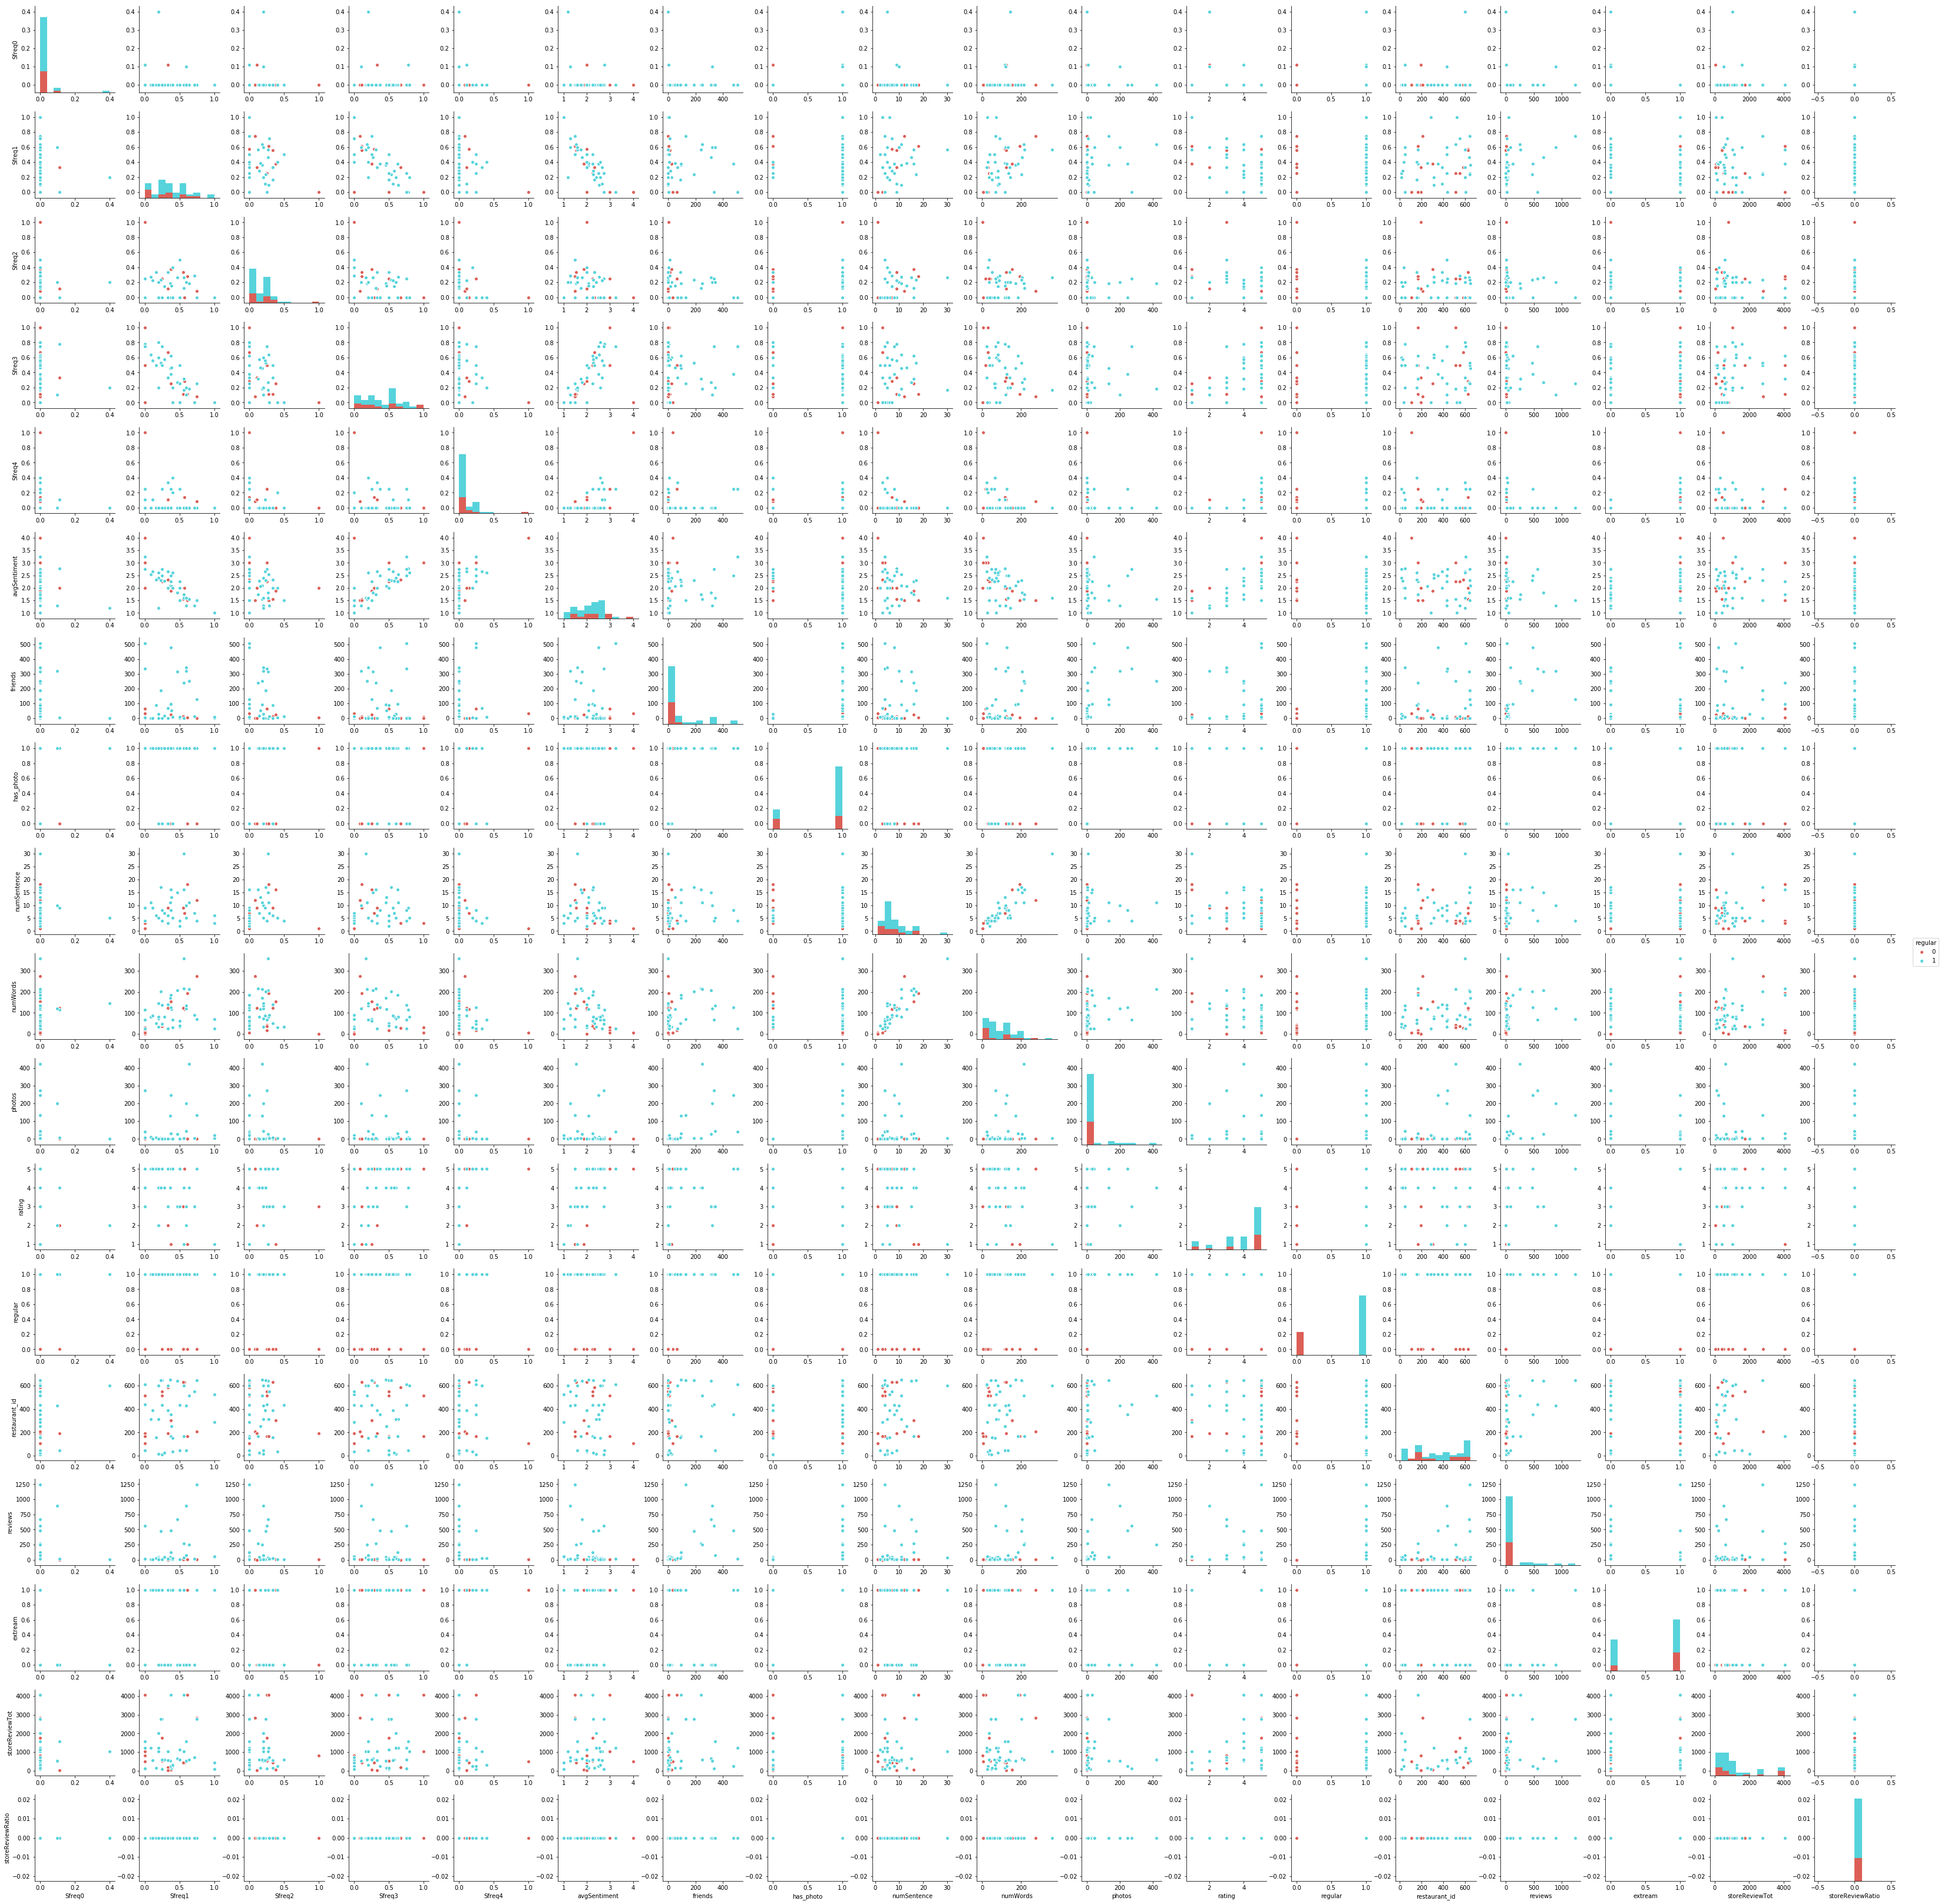

In [26]:
# Scatter Matrix
import seaborn as sns  

# sample values only for scatter plot
sample_scatter = reviews2.sample(n = 50, random_state = 0, axis = 0)

sns.pairplot(sample_scatter, hue = 'regular', palette = 'hls')
plt.show()

<span style="color:blue">  
    This scatter plot is for just glancing throught data distribution.  Can see some collinearities among predictors.      
</span>

In [27]:
# corr.coef
reviews2.corr()

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,avgSentiment,friends,has_photo,numSentence,numWords,photos,rating,regular,restaurant_id,reviews,extream,storeReviewTot,storeReviewRatio
Sfreq0,1.000000,0.007006,-0.051457,-0.152971,-0.055136,-0.286111,0.007543,-0.020426,0.001934,0.071520,0.017373,-0.188450,0.016952,0.003615,0.010069,-0.012459,-0.018898,-0.002829
Sfreq1,0.007006,1.000000,-0.216203,-0.669290,-0.279057,-0.862764,0.056244,0.013507,0.240567,0.322812,0.038042,-0.464043,0.168953,0.015663,0.080757,-0.190579,-0.018639,0.009047
Sfreq2,-0.051457,-0.216203,1.000000,-0.379482,-0.166809,-0.144319,0.009505,0.007544,0.096257,-0.008371,0.002938,-0.088875,-0.001388,0.016229,0.014067,-0.033836,-0.007866,0.001872
Sfreq3,-0.152971,-0.669290,-0.379482,1.000000,-0.122686,0.711268,-0.044768,-0.001043,-0.223643,-0.247802,-0.031663,0.425855,-0.119539,-0.023927,-0.062545,0.131331,0.020101,-0.006041
Sfreq4,-0.055136,-0.279057,-0.166809,-0.122686,1.000000,0.540853,-0.034321,-0.024362,-0.141335,-0.137408,-0.024666,0.234092,-0.087572,-0.006012,-0.053067,0.150387,0.013629,-0.006422
avgSentiment,-0.286111,-0.862764,-0.144319,0.711268,0.540853,1.000000,-0.062104,-0.013571,-0.269671,-0.327478,-0.047367,0.536488,-0.170415,-0.021085,-0.090094,0.213666,0.026871,-0.009052
friends,0.007543,0.056244,0.009505,-0.044768,-0.034321,-0.062104,1.000000,0.161849,0.175712,0.183247,0.400244,0.005329,0.131587,0.007249,0.568699,-0.092111,0.033676,-0.003018
has_photo,-0.020426,0.013507,0.007544,-0.001043,-0.024362,-0.013571,0.161849,1.000000,0.101932,0.097997,0.062755,0.067231,0.236861,0.016082,0.146856,-0.094169,0.045321,0.005648
numSentence,0.001934,0.240567,0.096257,-0.223643,-0.141335,-0.269671,0.175712,0.101932,1.000000,0.908972,0.105970,-0.146224,0.222177,0.002607,0.159977,-0.109568,0.074860,-0.005157
numWords,0.071520,0.322812,-0.008371,-0.247802,-0.137408,-0.327478,0.183247,0.097997,0.908972,1.000000,0.120542,-0.184683,0.216762,-0.001609,0.168522,-0.130017,0.078333,-0.005081


<span style="color:blue">  
    Attributes showing corr.coef higher than 0.2: 
    - 'numSentence'
    - 'numWords'
    - 'has_photo'
    - 'totSentiment'
    - 'reviews'
</span>

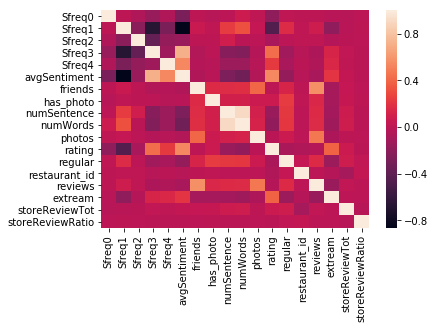

In [28]:
# Heatmap for the correlation coefficients
corr = reviews2.corr()
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

<span style="color:blue">  
    'numSentence' and 'totSentiment' are highly correlated since the 'totSentiment' is the sum of sentiment values from all sentences. 'totSentiment' is redundant so it needs to be removed.  
    'numSentence' and 'numWords' are also highly correlated.
    'avgSentiment' is higly negatively correlated w/ 'Sfreq1'(ratio of negative reveiw sentence) and
    'avgSentiment' is positively correltated w/ 'Sfreq3'&'Sfreq4'(ratio of positive review sentence)
</span>

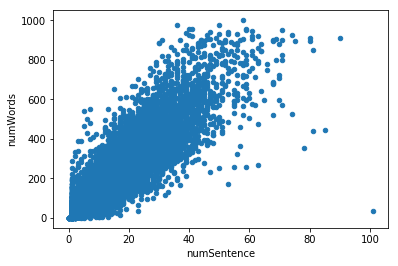

In [29]:
reviews2.loc[:, ['numSentence', 'numWords']].plot(x = 'numSentence', y = 'numWords', kind = 'scatter')
plt.show()

In [30]:
# # Jupyter ouput cell max height adjustment

# %%html
# <style>
# .output_wrapper, .output {
#     height:auto !important;
#     max-height:1000px;  /* your desired max-height here */
# }
# .output_scroll {
#     box-shadow:none !important;
#     webkit-box-shadow:none !important;
# }
# </style>

<span style="color:blue">  
    Some odd cases have more number of sentences than the number of words.
</span>

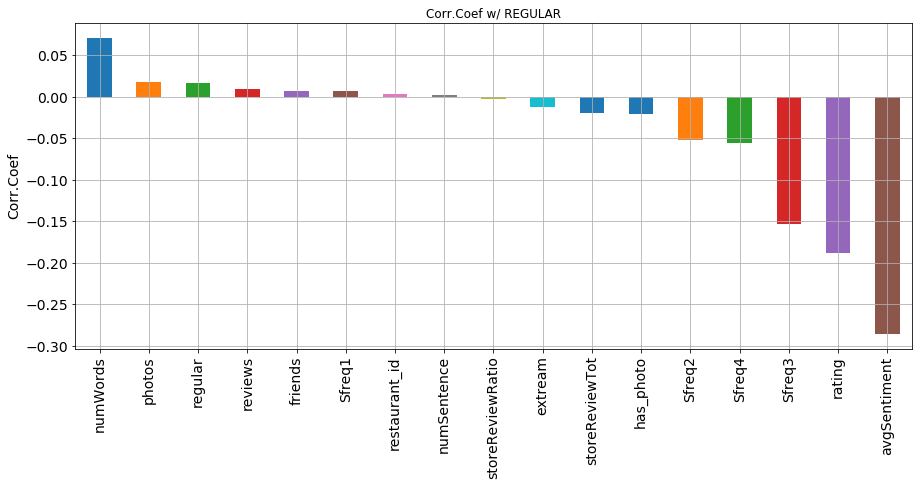

In [31]:
%matplotlib inline
# Correlation w/ 'REGULAR' variable
cor = corr.iloc[1:len(corr),0]

plt.figure(figsize = (15,6))
cor.sort_values(ascending = False).plot(kind = 'bar', grid = 1, title ='Corr.Coef w/ REGULAR')

plt.ylabel('Corr.Coef', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

<span style="color:blue">  
    Top 5 attributes correlated w/ 'regular'
</span>
- 'numSentence'
- 'numWords'
- 'has_photo'
- 'reviews'
- 'avgSentiment'

 Sentiment value meaning = {0: Very Negative, 1 : Negative, 2 : Neutral, 3 : Positive, 4: Very Positive}

## <span style="color:black"> Multicollinearity  </span>

<span style="color:black"> Collinearity may affect the regression task. ** However, if the abs(coefficient of correlation) is close to 1, it is definitely a redundant feature in a model.**  
    
Below scatter matrix allows to check correlations visually. The scatter plots looking like a straight line show the redundancy in features. </span>

In [32]:
# Identifying highly correlated attributes

corr = dfX.corr()
HighCorr = corr > .85  # Enter desired corr.coef value as a limit

result = pd.melt(HighCorr.reset_index(), id_vars=['index'])
mask = result['value'] == True
result = result.loc[mask, ['index', 'variable']]
result.columns = [0, 1]
# print(result)

HighCorr_var = result.loc[result.loc[:,0] != result.loc[:,1] ,:]
print('Highly correlated variables : \n',HighCorr_var)
HighCorr_varList = HighCorr_var.loc[:,0]
HighCorr_varList = HighCorr_varList.drop_duplicates()
# print(HighCorr_varList)

Highly correlated variables : 
                0            1
145     numWords  numSentence
161  numSentence     numWords


### Above correlated values can be removed by using the feature importance rank.  If two variables are highly correlated, the feature that is less important to the dependent variable will be removed.

In [33]:
# # drop 'totSentiment' column
# reviews3 = reviews3.drop('totSentiment', axis = 1)
# dfX = dfX.drop('totSentiment', axis = 1)

## Chi-Square Independence Test

#### Categorical variables are tested to see if there is a significant association with 'regular' values. Attributes are sorted by p-value so the top attributes have more association with 'churn' values. 

In [34]:
## Input dataFrame

df = reviews2.loc[:,['regular','has_photo','rating','avgSentiment']]
df.avgSentiment = round(df.avgSentiment*2)/2    # avgSentiment values are rounded to the nearest 0.5
# df.describe()
df.applymap(str)
col_list_obj = list(df)
obj_len = len(col_list_obj) # number of object attributes

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102028 entries, 0 to 104057
Data columns (total 4 columns):
regular         102028 non-null int64
has_photo       102028 non-null int64
rating          102028 non-null int64
avgSentiment    102028 non-null float64
dtypes: float64(1), int64(3)
memory usage: 8.9 MB


In [36]:
# Chi-Square Test to check the independence from 'regular'
# Output: Attribute name, chi-squrare value, p-values

import scipy.stats as scs
from scipy.stats import chi2_contingency


## chi-square test

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

chi2_value = np.zeros(obj_len)  # prep for chi2 value output
p_value = np.zeros(obj_len)     # prep for p-value output

# Collecting Chi-square test p-values for all categorical attributes
for i in range(1,obj_len):
    chiOut = chisq_of_df_cols(df, 'regular', col_list_obj[i])
    chi2_value[i] = chiOut[0]
    p_value[i] = chiOut[1]

    
## Print Attribute name and Chi-square/p-values in a ascending order
Chi2_Result = pd.DataFrame({'Attribute' :col_list_obj,'chi-square':chi2_value,'p-value':p_value})
Chi2_Result = Chi2_Result.sort_values(by = 'p-value', axis = 0, ascending = True)
Chi2_Result = Chi2_Result.reset_index(drop = True)
print(Chi2_Result)

# Source of def "chisq_of_df_cols" <https://codereview.stackexchange.com/questions/96761/chi-square-independence-test-for-two-pandas-df-columns>

      Attribute   chi-square  p-value
0       regular     0.000000      0.0
1     has_photo  5722.855182      0.0
2        rating  2186.744492      0.0
3  avgSentiment  5089.512636      0.0


In [37]:
# checking w/ another chi-square test code
# ref: <https://codereview.stackexchange.com/questions/96761/chi-square-independence-test-for-two-pandas-df-columns>
import pandas as pd
import scipy.stats as scs

def categories(series):
    return range(int(series.min()), int(series.max()) + 1)

def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]
    cats1, cats2 = categories(df_col1), categories(df_col2)

    def aux(is_cat1):
        return [sum(is_cat1 & (df_col2 == cat2))
                for cat2 in cats2]

    result = [aux(df_col1 == cat1)
              for cat1 in cats1]

    return scs.chi2_contingency(result)

print(chi_square_of_df_cols(df, 'regular', 'has_photo'))

(5722.8551820212297, 0.0, 1, array([[  6877.22175285,  20179.77824715],
       [ 19055.77824715,  55915.22175285]]))


<span style="color:blue">  
    Chi-Squre Independence Test Result
</span>

Under the test assumptions:
1. Expected frequency for each cell of a contingency table is greater than 5.
2. Samples are independent

<span style="color:blue">  
    This independence test is performed to check the association between 'regular' and each categorical attributes. The null hypothesis is that the 'regular' is independent from another test attribute.  
    **All categorical attributes ( 'has_photo','rating','avgSentiment') showed very small p-values which reject the independence from 'regular' attribute. **
</span>

## Logistic regression


Accuracy: 
 0.739
Confusion: 
 [[ 587 2119]
 [ 549 6949]]


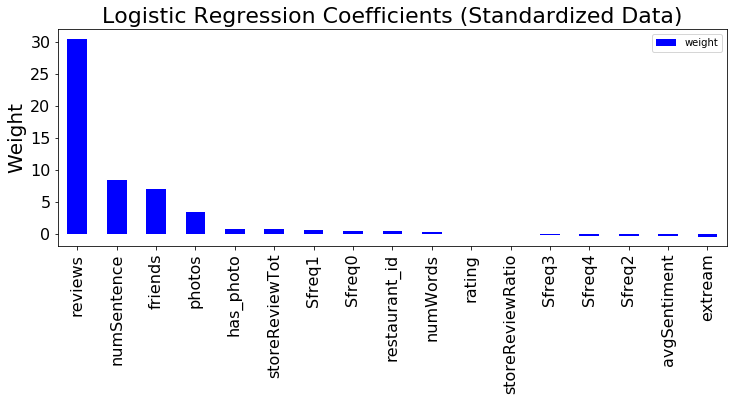


Accuracy: 
 0.753
Confusion: 
 [[ 532 2174]
 [ 346 7151]]


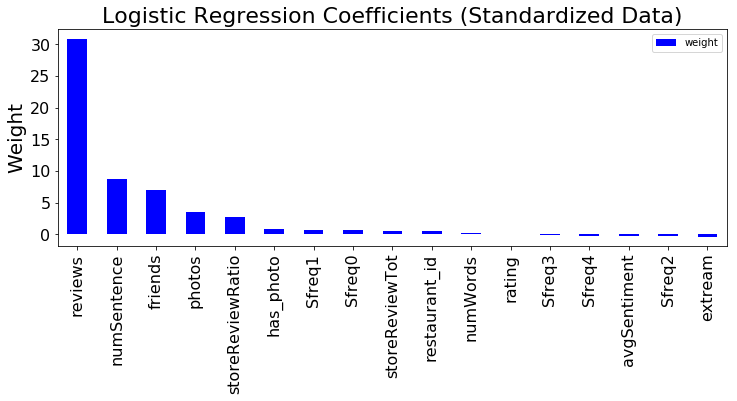


Accuracy: 
 0.715
Confusion: 
 [[ 361 2345]
 [ 559 6938]]


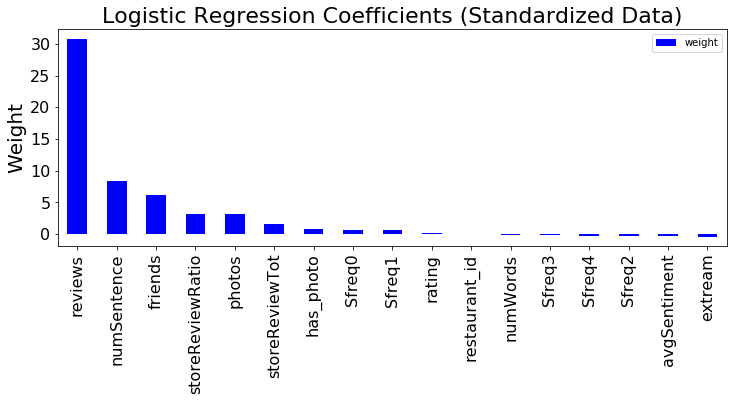


Accuracy: 
 0.75
Confusion: 
 [[ 529 2177]
 [ 371 7126]]


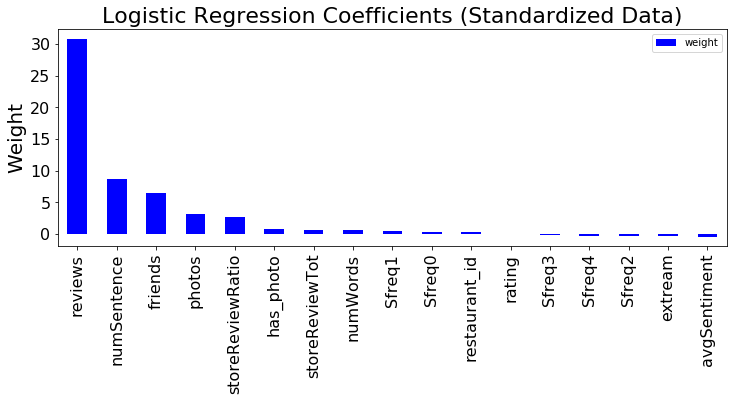


Accuracy: 
 0.744
Confusion: 
 [[ 663 2043]
 [ 571 6926]]


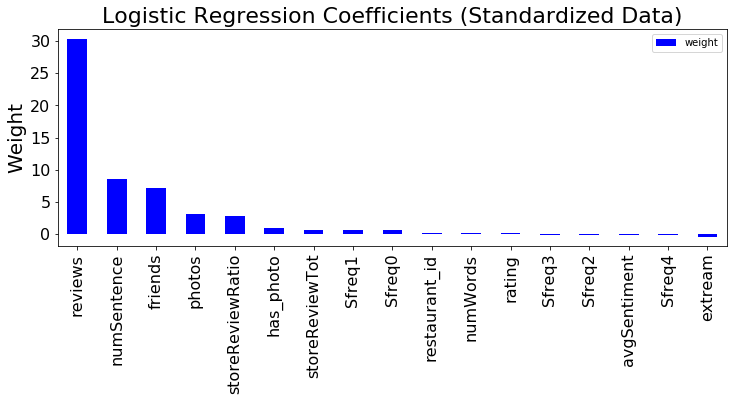


Accuracy: 
 0.693
Confusion: 
 [[  97 2609]
 [ 520 6977]]


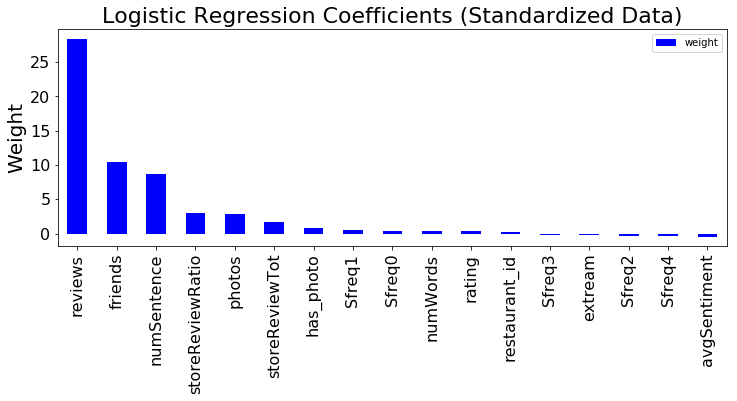


Accuracy: 
 0.73
Confusion: 
 [[ 617 2089]
 [ 665 6832]]


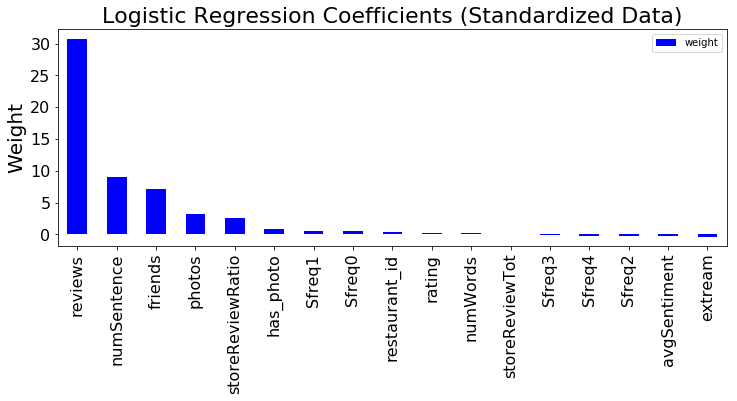


Accuracy: 
 0.751
Confusion: 
 [[ 708 1997]
 [ 543 6954]]


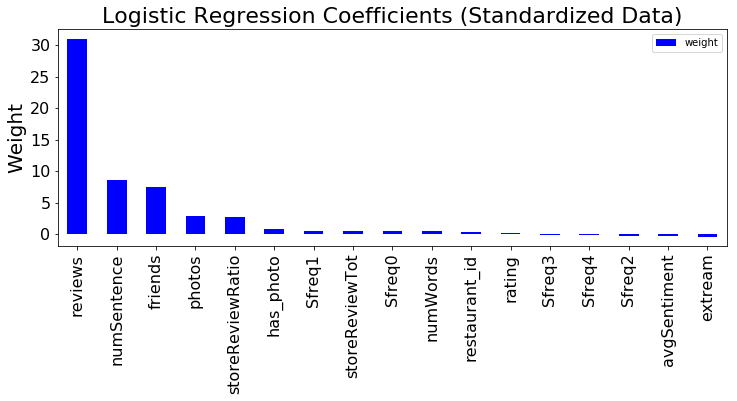


Accuracy: 
 0.757
Confusion: 
 [[ 466 2239]
 [ 236 7261]]


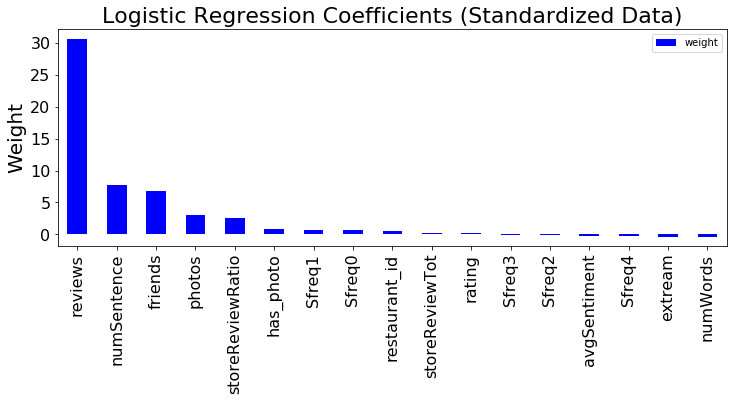


Accuracy: 
 0.758
Confusion: 
 [[ 627 2078]
 [ 391 7106]]


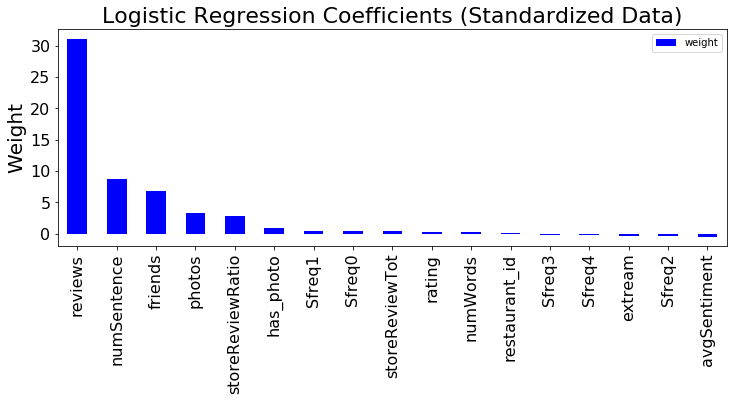

In [38]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics as mt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold



# define predictor and outcome variables
X = dfX.as_matrix()
y = dfY.as_matrix()


# Cross validation object
num_cv_iterations = 10
cv_object = StratifiedKFold(n_splits = num_cv_iterations, random_state = 1)
# num_instances = len(y)

model_score = np.zeros((num_cv_iterations, 1, 5))

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = MinMaxScaler()  # scale obj
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) # apply data scaling w/ range between (0,1)
    X_test_scaled = scl_obj.transform(X_test) 

    # train the model  
    clf = LogisticRegression(C = 1, penalty = 'l2', random_state = 0)
    clf.fit(X_train_scaled, y_train)

    # print results
    y_hat = clf.predict(X_test_scaled)        # prediction output
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    
    print('\nAccuracy: \n', round(acc,3) )
    print('Confusion: \n', conf)
    coef_norm = clf.coef_


    # plot weight of predictors
    col_name = list(dfX)
    coef_norm1 = pd.DataFrame(coef_norm[0], index = col_name, columns = ['weight'])


    coef_norm1.sort_values('weight', ascending = False).plot(kind = 'bar', color='blue', figsize = (12,4))
    plt.title('Logistic Regression Coefficients (Standardized Data)', size = 22)
#     plt.xlabel('Predictors', size = 20)
    plt.ylabel('Weight', size = 20)
    plt.xticks(size = 16)
    plt.yticks(size = 16)

    plt.show()

LogisticRegression , Score Average: 
    Accuracy  Conf_TN  Conf_FP  Conf_FN  Conf_TP
0  0.739082    518.7   2187.0    475.1   7022.0

Score Standard Deviation: 
    Accuracy     Conf_TN  Conf_FP     Conf_FN     Conf_TP
0  0.019784  169.845253   169.99  124.952351  124.893555

Elapsed time for  LogisticRegression  is  0.2  minutes


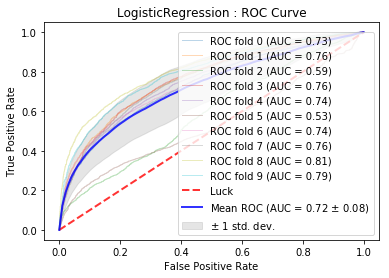

In [39]:
# Stratified k-fold cross validation

# import libraries
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Classifier library
from sklearn.linear_model import LogisticRegression


# Define predictor and outcome variables
X = dfX.as_matrix()
y = dfY.as_matrix()

# Cross validation object
num_cv_iterations = 10
cv_object = StratifiedKFold(n_splits = num_cv_iterations, random_state = 1)


# Classifier
names = ['LogisticRegression']

classifiers = [LogisticRegression(C = 1, penalty = 'l2', random_state = 0)]

result_final = np.zeros((len(names), 13)) # table collecting accuracy, confusion, and calculation time

# loop for three classifiers
j = 0;
for name, clf in zip(names, classifiers):
    t = time.time()  # time recording for each classifiers
    
    # Result table prep
    model_score_col = ['Accuracy', 'Conf_TN','Conf_FP','Conf_FN','Conf_TP']
    model_score = np.zeros((num_cv_iterations, len(model_score_col)))

    yhat_score = np.zeros((y.shape[0],1))

    # Roc prep
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    # CV iteration number
    i = 0

    for train_indices, test_indices in cv_object.split(X,y): 

        X_train = X[train_indices]
        y_train = y[train_indices]

        X_test = X[test_indices]
        y_test = y[test_indices]

        # Standardization
        scl_obj = MinMaxScaler()
        scl_obj.fit(X_train) 

        X_train_scaled = scl_obj.transform(X_train)                  
        X_test_scaled = scl_obj.transform(X_test) 

        # Train & Predict
        clf.fit(X_train_scaled, y_train)
        y_hat = clf.predict(X_test_scaled) # get test set precitions

        # Accuracy & Confusion matrix output
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
        model_score[i, :] = np.append(acc, conf.ravel())             # Collect prediction outputs

        # Roc curve score
        probas_ = clf.predict_proba(X_test_scaled)                   # get test set precitions

        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1

    # print 10-fold result average
    score_mean = pd.DataFrame(model_score.mean(axis = 0)).T
    score_mean.columns = model_score_col
    print(name, ', Score Average: \n',score_mean)

    score_std = pd.DataFrame(model_score.std(axis = 0)).T
    score_std.columns = model_score_col
    print('\nScore Standard Deviation: \n',score_std)

    elapsed = time.time() - t
    print('\nElapsed time for ',name, ' is ', round(elapsed/60, 1), ' minutes')
    
    
    # ROC Plot
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name + ' : ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # collect final average results
    resultAvg = np.append(np.append(np.append(np.append(score_mean.as_matrix(columns=None), score_std.as_matrix(columns=None)), elapsed),mean_auc),std_auc)
    result_final[j] = resultAvg
    j += 1

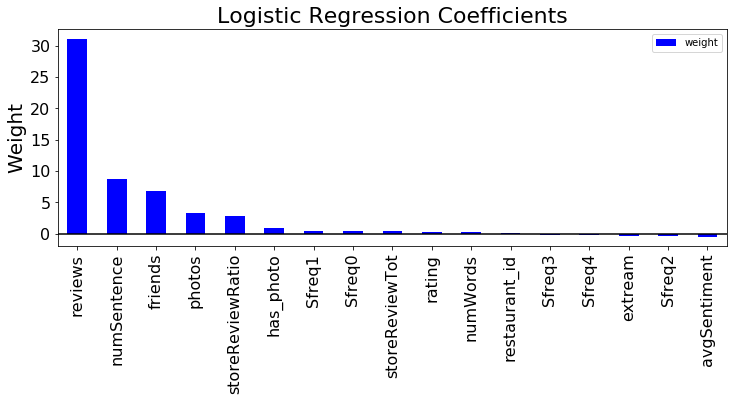

In [40]:
# Logistic regression weight values
# This will grab the coefficients from the last CV run

# regression coefficients
coef_norm = clf.coef_

# plot weight of predictors
col_name = list(dfX)
coef_norm1 = pd.DataFrame(coef_norm[0], index = col_name, columns = ['weight'])

coef_norm1.sort_values('weight', ascending = False).plot(kind = 'bar', color='blue', figsize = (12,4))
plt.title('Logistic Regression Coefficients', size = 22)

plt.ylabel('Weight', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.axhline(0, color = 'black')

plt.show()